<a href="https://colab.research.google.com/github/camilla-lima0/PCMLAI-111/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    </content/crisp.png/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**ANSWER**

*   The goal is to develop a regression model that predicts the price of a used car
*   The model will be built using the provided dataset, where the 'price' will serve as the target variable. The remaining attributes in the dataset, such as year, model, manufacturer, sisze, and condition, will be treated as features.
*   The project will involve feature engineering to create new variables that may have a stronger predictive power.

*   The final output will be an analysis of the feature importance scores from the trained model, which will quantify the impact of each factor on the final sale price, thereby providing actionable insights for the dealership.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from lightgbm import LGBMRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/vehicles.csv')

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
# DATA UNDERSTANDING 1 #
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
# DATA UNDERSTANDING 2 #
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

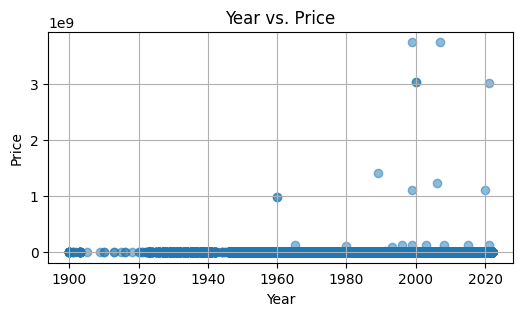

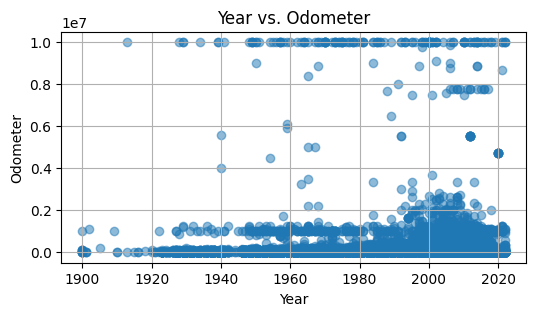

In [6]:
# DATA UNDERSTANDING 3 #
# Scatter: Price and Odometer per Year #

plt.figure(figsize=(6, 3))
plt.scatter(data['year'], data['price'], alpha=0.5)
plt.title('Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
plt.scatter(data['year'], data['odometer'], alpha=0.5)
plt.title('Year vs. Odometer')
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.grid(True)
plt.show()

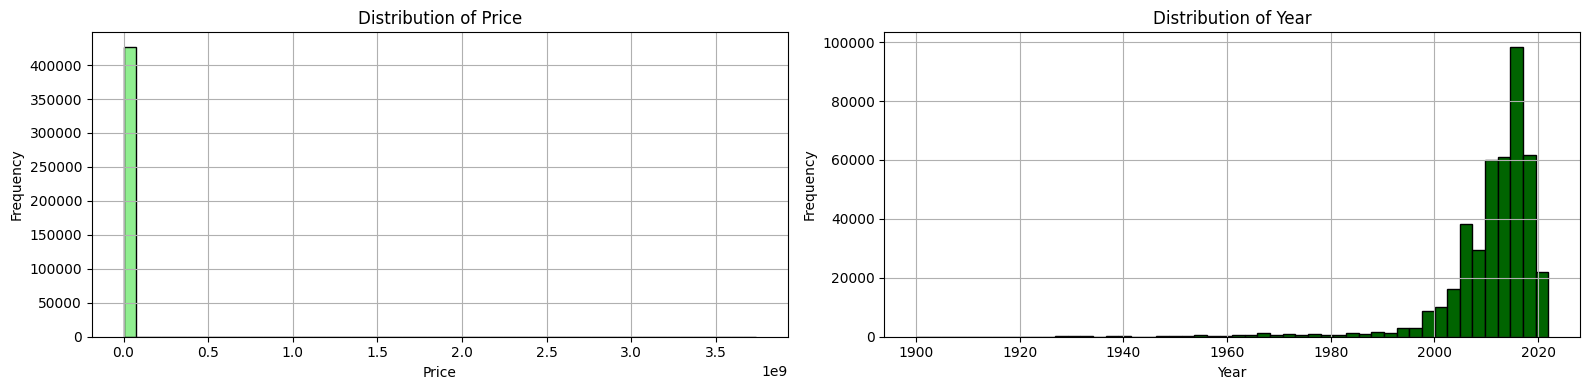

In [7]:
# DATA UNDERSTANDING 4 #
# Histograms: Price and Odometer #

plt.figure(figsize=(16, 4))

#PRICE
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=50, edgecolor='black', color='lightgreen')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

#YEAR
plt.subplot(1, 2, 2)
plt.hist(data['year'], bins=50, edgecolor='black',color='darkgreen')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


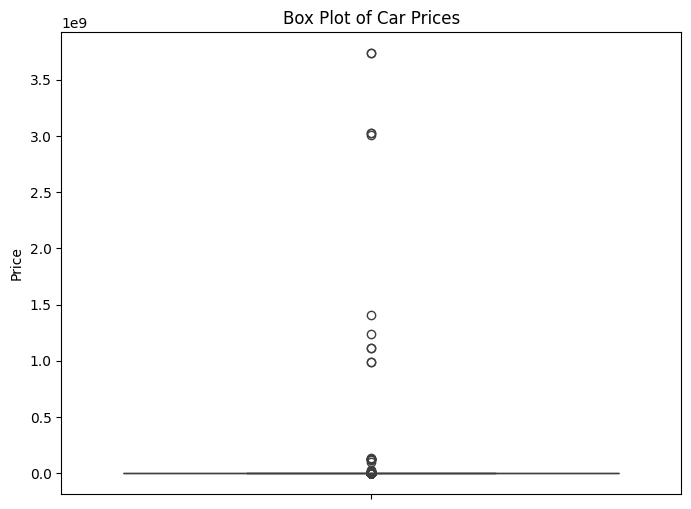

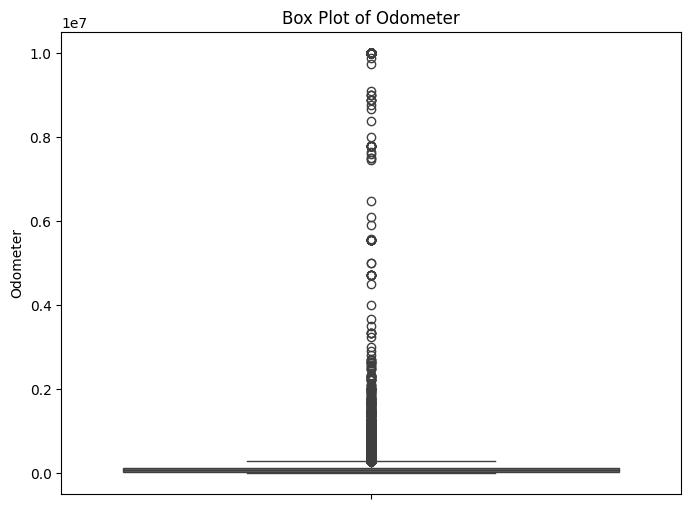

In [8]:
# DATA UNDERSTANDING 5 #
# Box Plot: Price and Odometer #

plt.figure(figsize=(8, 6))
sns.boxplot(y=data['price'])
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=data['odometer'])
plt.title('Box Plot of Odometer')
plt.ylabel('Odometer')
plt.show()

**Data Understanding:** There are a lot of outliers; and categorical fields that will need to be manipulated

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [9]:
# Data Preparation #

# 1: drop NA for the main fields #
data.dropna(subset=['year'], inplace=True)
data.dropna(subset=['price'], inplace=True)

# 2: Remove Outliers for Price and Odometer

#PRICE
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
price_lower_bound = Q1 - 1.5 * IQR
price_upper_bound = Q3 + 1.5 * IQR
df_cleaned = data[(data['price'] >= price_lower_bound) & (data['price'] <= price_upper_bound)]

#ODOMETER
Q12 = df_cleaned['odometer'].quantile(0.25)
Q32 = df_cleaned['odometer'].quantile(0.75)
IQR = Q32 - Q12
price_lower_bound = Q12 - 1.5 * IQR
price_upper_bound = Q32 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['odometer'] >= price_lower_bound) & (df_cleaned['odometer'] <= price_upper_bound)]

# 3: Adjust "Year" to be "Age" so its easier for the model to interpret
current_year = 2025
df_cleaned['age'] = current_year - df_cleaned['year']
df_cleaned.drop(columns=['year'], inplace=True)



# 4: Adjust "Cylinders" to be remove 'cylinder' string
df_cleaned['cylinders'] = df_cleaned['cylinders'].astype(str)
df_cleaned['cylinders'] = df_cleaned['cylinders'].str.extract('(\d+)').astype(float).fillna(0).astype(int)


# 5 Add miles per year as a better dataset than odometer
df_cleaned['mileage_per_year'] = df_cleaned['odometer'] / (df_cleaned['age'] + 1)


df_cleaned.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age,mileage_per_year
27,7316814884,auburn,33590,gmc,sierra 1500 crew cab slt,good,8,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,11.0,4826.916667
28,7316814758,auburn,22590,chevrolet,silverado 1500,good,8,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,15.0,4451.812500
29,7316814989,auburn,39590,chevrolet,silverado 1500 crew,good,8,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,5.0,3193.333333
30,7316743432,auburn,30990,toyota,tundra double cab sr,good,8,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,8.0,4569.333333
31,7316356412,auburn,15000,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,12.0,9846.153846


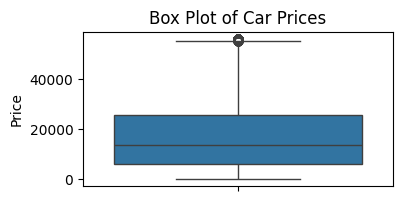

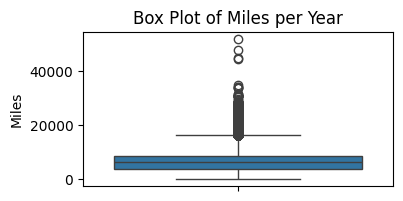

In [10]:
# Data Preparation #

# 6: Box Plot to Check Distribution

plt.figure(figsize=(4, 2))
sns.boxplot(y=df_cleaned['price'])
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(y=df_cleaned['mileage_per_year'])
plt.title('Box Plot of Miles per Year')
plt.ylabel('Miles')
plt.show()

In [11]:
# Prep for Models #

# 1 Selecting Features #
numerical_features = ['age', 'mileage_per_year', 'cylinders']
categorical_features = ['condition', 'manufacturer', 'fuel', 'drive', 'type','size']
target_variable = 'price'
X = df_cleaned[numerical_features + categorical_features]
y = df_cleaned[target_variable]

# 2 Creating train and test splits #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()

,age,mileage_per_year,cylinders,condition,manufacturer,fuel,drive,type,size
178710,10.0,8592.545455,0,NaN,chevrolet,other,4wd,pickup,NaN
420636,12.0,10896.230769,0,excellent,ford,gas,4wd,SUV,NaN
32188,8.0,7222.222222,0,NaN,kia,gas,NaN,NaN,NaN
177093,20.0,0.047619,0,NaN,NaN,gas,NaN,truck,full-size
50770,14.0,3057.200000,0,good,bmw,other,rwd,other,NaN


In [12]:
# Prep for Models #

# 3 Modify Categorical Features using One-Hot Encode #

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]), index=X_train.index)
X_train_encoded.columns = encoder.get_feature_names_out(categorical_features)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]), index=X_test.index)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_features)

# 4 Remove NaN Columns #

X_train_encoded = X_train_encoded.drop('condition_nan', axis=1)
X_train_encoded = X_train_encoded.drop('type_nan', axis=1)
X_train_encoded = X_train_encoded.drop('manufacturer_nan', axis=1)
X_train_encoded = X_train_encoded.drop('size_nan', axis=1)
X_train_encoded = X_train_encoded.drop('drive_nan', axis=1)

X_test_encoded = X_test_encoded.drop('condition_nan', axis=1)
X_test_encoded = X_test_encoded.drop('type_nan', axis=1)
X_test_encoded = X_test_encoded.drop('manufacturer_nan', axis=1)
X_test_encoded = X_test_encoded.drop('size_nan', axis=1)
X_test_encoded = X_test_encoded.drop('drive_nan', axis=1)

feature_names = X_train_encoded.columns.tolist()

X_train_encoded.head()

,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,size_compact,size_full-size,size_mid-size,size_sub-compact
332255,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
82962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
191636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
310081,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Prep for Models #

# 4 Scale Numerical Features #

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), index=X_train.index, columns=numerical_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]), index=X_test.index, columns=numerical_features)

X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis=1)

print(f"Final features for modeling: {X_train_final.shape[1]}\n")

Final features for modeling: 77



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [14]:
# MODEL 1: LINEAR REGRESSION

model1 = LinearRegression()
model1.fit(X_train_final, y_train)

y_pred = model1.predict(X_test_final)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R2 Score): {r2:.2f}\n")

Mean Absolute Error (MAE): $7,657.39
Mean Squared Error (MSE): $108,494,044.00
R-squared (R2 Score): 0.36



In [15]:
# MODEL 1: LINEAR REGRESSION

coefficients = model1.coef_
feature_names = X_train_final.columns
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
sorted_coef = coef_df.sort_values(by='abs_coefficient', ascending=False).head(15)

positive_coef_df = coef_df[coef_df['coefficient'] > 0]
negative_coef_df = coef_df[coef_df['coefficient'] < 0]
sorted_positive = positive_coef_df.sort_values(by='coefficient', ascending=False)
sorted_negative = negative_coef_df.sort_values(by='coefficient', ascending=True)

print("Features that INCREASE Car Price")
print(sorted_positive[['feature', 'coefficient']].round(2))
print("\n" * 2)
print("Features that DECREASE Car Price")
print(sorted_negative[['feature', 'coefficient']].round(2))



Features that INCREASE Car Price
                       feature  coefficient
47          manufacturer_tesla     14962.18
18         manufacturer_datsun     12201.78
42        manufacturer_porsche      9226.24
68                 type_pickup      6879.41
10     manufacturer_alfa-romeo      6797.09
44          manufacturer_rover      6396.28
28         manufacturer_jaguar      6119.12
51                 fuel_diesel      5507.19
12           manufacturer_audi      5069.26
32          manufacturer_lexus      4519.91
63                  type_coupe      4184.37
67                  type_other      4048.51
70                  type_truck      3746.28
62            type_convertible      3616.09
43            manufacturer_ram      3612.68
9           manufacturer_acura      3436.25
33        manufacturer_lincoln      3370.68
66                type_offroad      3079.83
15       manufacturer_cadillac      3053.99
71                    type_van      2863.16
50          manufacturer_volvo      2858.85

In [16]:
################
## NEXT MODEL ##
################

In [17]:
# MODEL 2: LGBMRegressor

model2 = LGBMRegressor(random_state=42, force_col_wise= True)
model2.fit(X_train_final, y_train)

y_pred2 = model2.predict(X_test_final)
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

print(f"Mean Absolute Error (MAE): ${mae2:,.2f}")
print(f"Mean Squared Error (MSE): ${mse2:,.2f}")
print(f"R-squared (R2 Score): {r22:.2f}\n")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 327010, number of used features: 73
[LightGBM] [Info] Start training from score 16414.520278
Mean Absolute Error (MAE): $5,417.73
Mean Squared Error (MSE): $67,725,515.26
R-squared (R2 Score): 0.60



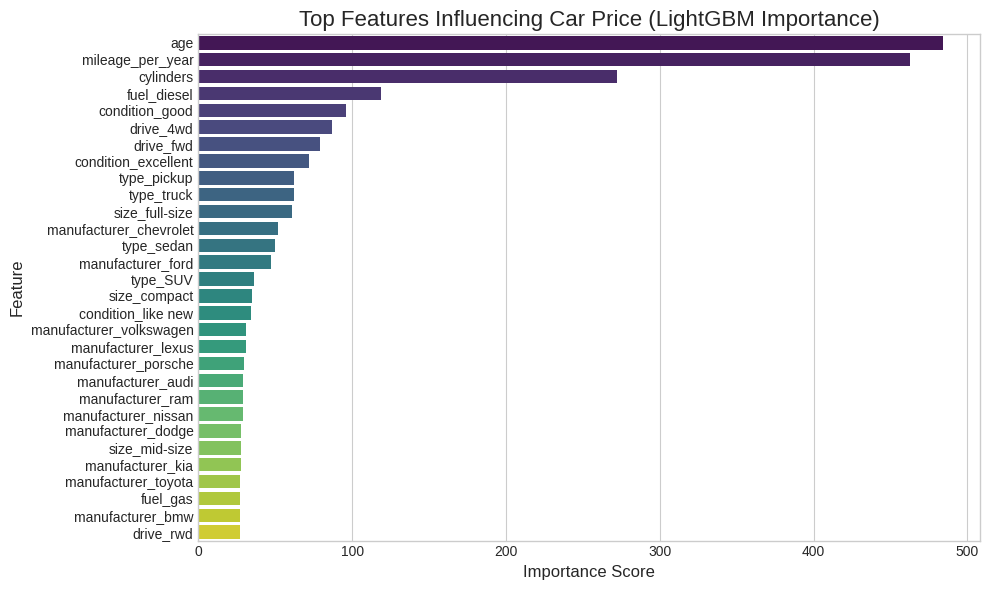

In [18]:
# MODEL 2: LGBMRegressor

importances = model2.feature_importances_
feature_names = X_train_final.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
sorted_importance = importance_df.sort_values(by='importance', ascending=False).head(30)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='importance', y='feature', hue='feature',data=sorted_importance, palette='viridis', ax=ax)
ax.set_title('Top Features Influencing Car Price (LightGBM Importance)', fontsize=16)
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
################
## NEXT MODEL ##
################

In [20]:
# MODEL 3: Linear Regression with Polynomial Features

poly_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler())
])

X_train_poly_scaled = poly_pipeline.fit_transform(X_train[numerical_features])
X_test_poly_scaled = poly_pipeline.transform(X_test[numerical_features])
poly_feature_names = poly_pipeline.named_steps['polynomial_features'].get_feature_names_out(numerical_features)

# # One-Hot Encode categorical features
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# X_train_encoded = encoder.fit_transform(X_train[categorical_features])
# X_test_encoded = encoder.transform(X_test[categorical_features])
cat_feature_names = encoder.get_feature_names_out(categorical_features)

X_train_poly_final = np.hstack([X_train_poly_scaled, X_train_encoded])
X_test_poly_final = np.hstack([X_test_poly_scaled, X_test_encoded])
all_feature_names = list(poly_feature_names) + list(cat_feature_names)

X_train_final.shape[1]

77

In [21]:
# MODEL 3: Linear Regressio with Polynomial Features


model3 = LinearRegression()
model3.fit(X_train_poly_final, y_train)

y_pred3 = model3.predict(X_test_poly_final)
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)

print(f"Mean Absolute Error (MAE): ${mae3:,.2f}")
print(f"Mean Squared Error (MSE): ${mse3:,.2f}")
print(f"R-squared (R2 Score): {r23:.2f}\n")


Mean Absolute Error (MAE): $6,477.55
Mean Squared Error (MSE): $88,658,464.24
R-squared (R2 Score): 0.48



In [22]:
##################
### NEXT MODEL ###
##################


MODEL 4: Random Forest Regressor
Mean Absolute Error (MAE): $2,755.15
Mean Squared Error (MSE): $33,398,138.06
R-squared (R2 Score): 0.80



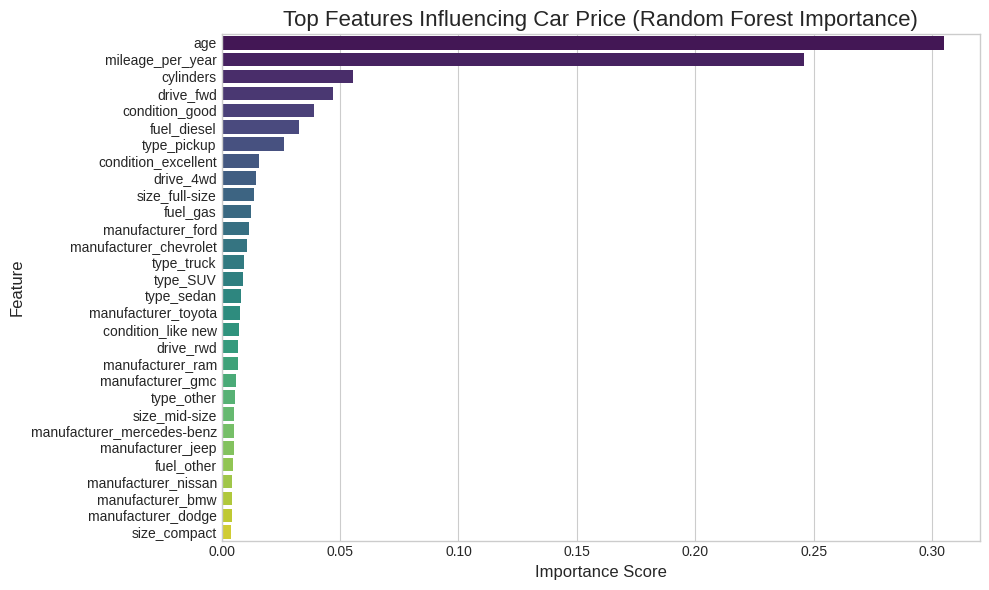

In [23]:
# MODEL 4: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
model4.fit(X_train_final, y_train)
y_pred4 = model4.predict(X_test_final)

# Evaluate the model's performance
mae4 = mean_absolute_error(y_test, y_pred4)
mse4 = mean_squared_error(y_test, y_pred4)
r24 = r2_score(y_test, y_pred4)

print("\nMODEL 4: Random Forest Regressor")
print(f"Mean Absolute Error (MAE): ${mae4:,.2f}")
print(f"Mean Squared Error (MSE): ${mse4:,.2f}")
print(f"R-squared (R2 Score): {r24:.2f}\n")

# MODEL 4: Random Forest Regressor - Feature Importance
importances4 = model4.feature_importances_
feature_names_rf = X_train_final.columns
importance_df_rf = pd.DataFrame({'feature': feature_names_rf, 'importance': importances4})
sorted_importance_rf = importance_df_rf.sort_values(by='importance', ascending=False).head(30)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='importance', y='feature', hue='feature', data=sorted_importance_rf, palette='viridis', ax=ax)
ax.set_title('Top Features Influencing Car Price (Random Forest Importance)', fontsize=16)
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [24]:
##################
### NEXT MODEL ###
##################

In [25]:
# MODEL 5: Linear Regression with Feature Selection

from sklearn.feature_selection import SelectFromModel

sfm_estimator = LinearRegression()
sfm_estimator.fit(X_train_final, y_train)
selector = SelectFromModel(sfm_estimator, prefit=True, threshold='1.05*median', importance_getter='coef_')
X_train_selected = selector.transform(X_train_final)
X_test_selected = selector.transform(X_test_final)
selected_feature_indices = selector.get_support(indices=True)
selected_features_names = X_train_final.columns[selected_feature_indices]

print(f"Number of features before selection: {X_train_final.shape[1]}")
print(f"Number of features after selection: {X_train_selected.shape[1]}")
print(f"Selected features: {list(selected_features_names)}\n")

model5 = LGBMRegressor(random_state=42, force_col_wise=True)
model5.fit(X_train_selected, y_train)
y_pred5 = model5.predict(X_test_selected)
mae5 = mean_absolute_error(y_test, y_pred5)
mse5 = mean_squared_error(y_test, y_pred5)
r25 = r2_score(y_test, y_pred5)

print(f"Mean Absolute Error (MAE): ${mae5:,.2f}")
print(f"Mean Squared Error (MSE): ${mse5:,.2f}")
print(f"R-squared (R2 Score): {r25:.2f}\n")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of features before selection: 77
Number of features after selection: 36
Selected features: ['age', 'mileage_per_year', 'condition_fair', 'condition_salvage', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_audi', 'manufacturer_cadillac', 'manufacturer_datsun', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_jaguar', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mercury', 'manufacturer_mitsubishi', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_tesla', 'manufacturer_volvo', 'fuel_diesel', 'type_convertible', 'type_coupe', 'type_offroad', 'type_other', 'type_pickup', 'type_truck', 'type_van', 'size_compact', 'size_mid-size', 'size_sub-compact']



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 327010, number of used features: 34
[LightGBM] [Info] Start training from score 16414.520278


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Mean Absolute Error (MAE): $6,268.09
Mean Squared Error (MSE): $83,698,565.97
R-squared (R2 Score): 0.51



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

/tmp/ipython-input-26-3352158850.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_values, palette='viridis')


<Figure size 1000x600 with 0 Axes>

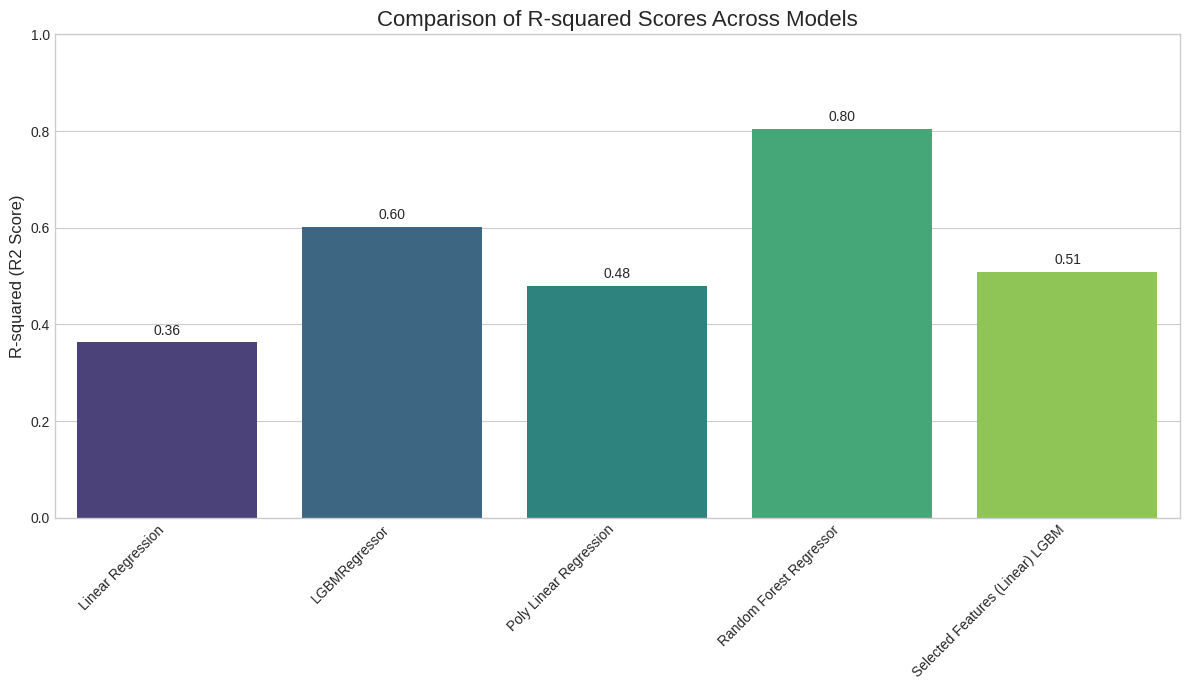

In [26]:
#####################
### R2 COMPARISON ###
#####################

r2_scores = {}

r2_scores['Linear Regression'] = r2
r2_scores['LGBMRegressor'] = r22
r2_scores['Poly Linear Regression'] = r23
r2_scores['Random Forest Regressor'] = r24
r2_scores['Selected Features (Linear) LGBM'] = r25

plt.figure(figsize=(10, 6))
model_names = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.figure(figsize=(12, 7))
sns.barplot(x=model_names, y=r2_values, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of R-squared Scores Across Models', fontsize=16)
plt.ylabel('R-squared (R2 Score)', fontsize=12)

plt.xticks(rotation=45, ha='right') # Rotate by 45 degrees and align to the right

for index, value in enumerate(r2_values):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



/tmp/ipython-input-29-917764674.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_scores, palette='viridis')


<Figure size 1000x600 with 0 Axes>

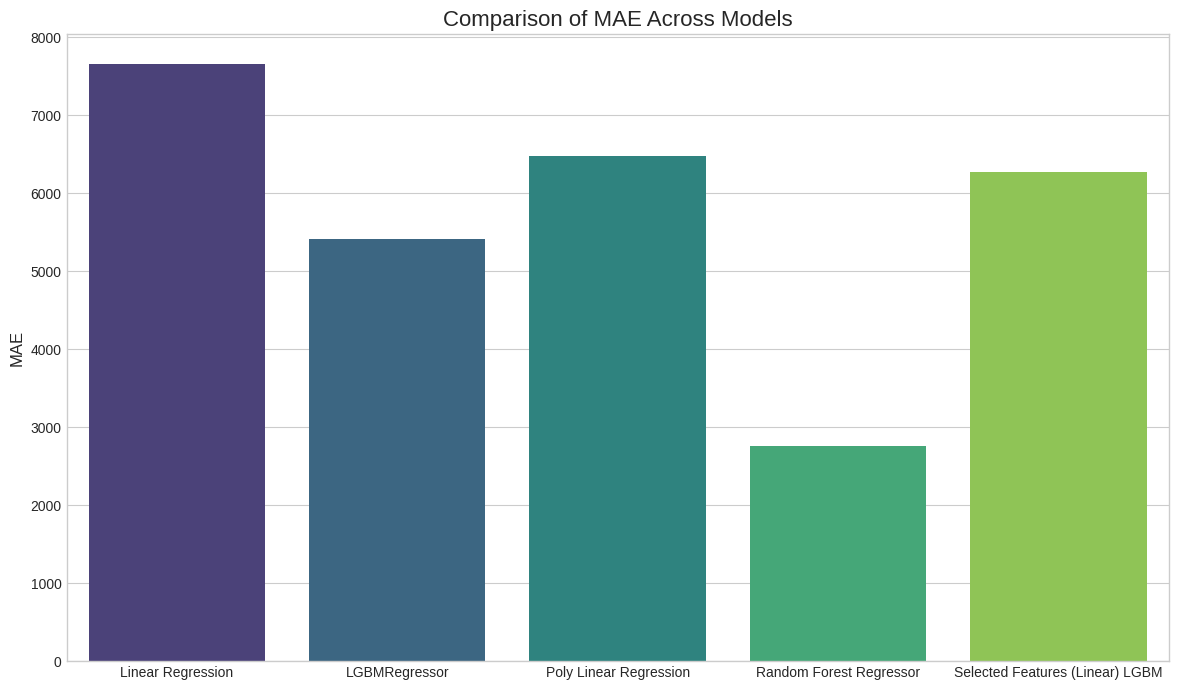

In [29]:
#####################
### MAE COMPARISON ###
#####################

mae_scores = {}

mae_scores['Linear Regression'] = mae
mae_scores['LGBMRegressor'] = mae2
mae_scores['Poly Linear Regression'] = mae3
mae_scores['Random Forest Regressor'] = mae4
mae_scores['Selected Features (Linear) LGBM'] = mae5

plt.figure(figsize=(10, 6))
model_names = list(mae_scores.keys())
mae_scores = list(mae_scores.values())

plt.figure(figsize=(12, 7))
sns.barplot(x=model_names, y=mae_scores, palette='viridis')
plt.title('Comparison of MAE Across Models', fontsize=16)
plt.ylabel('MAE', fontsize=12)

plt.tight_layout()
plt.show()



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**As you can see in the charts below, price of used cards vary by a lot of different factors:** Age, Mileage, Car Size, Car Type and Cylinders

**And in the last chart you can see which factors contribute the most to the reduction of car prices by "importance"**

**The conclusion is:** Age, Mileage and Cylinders are the most important features to determine the car price
  




/tmp/ipython-input-42-3830933714.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('age_bucket')['price'].agg(['median', 'count']).reset_index()
/tmp/ipython-input-42-3830933714.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_miles_analysis = df.groupby('total_miles_bucket')['price'].agg(['median', 'count']).reset_index()


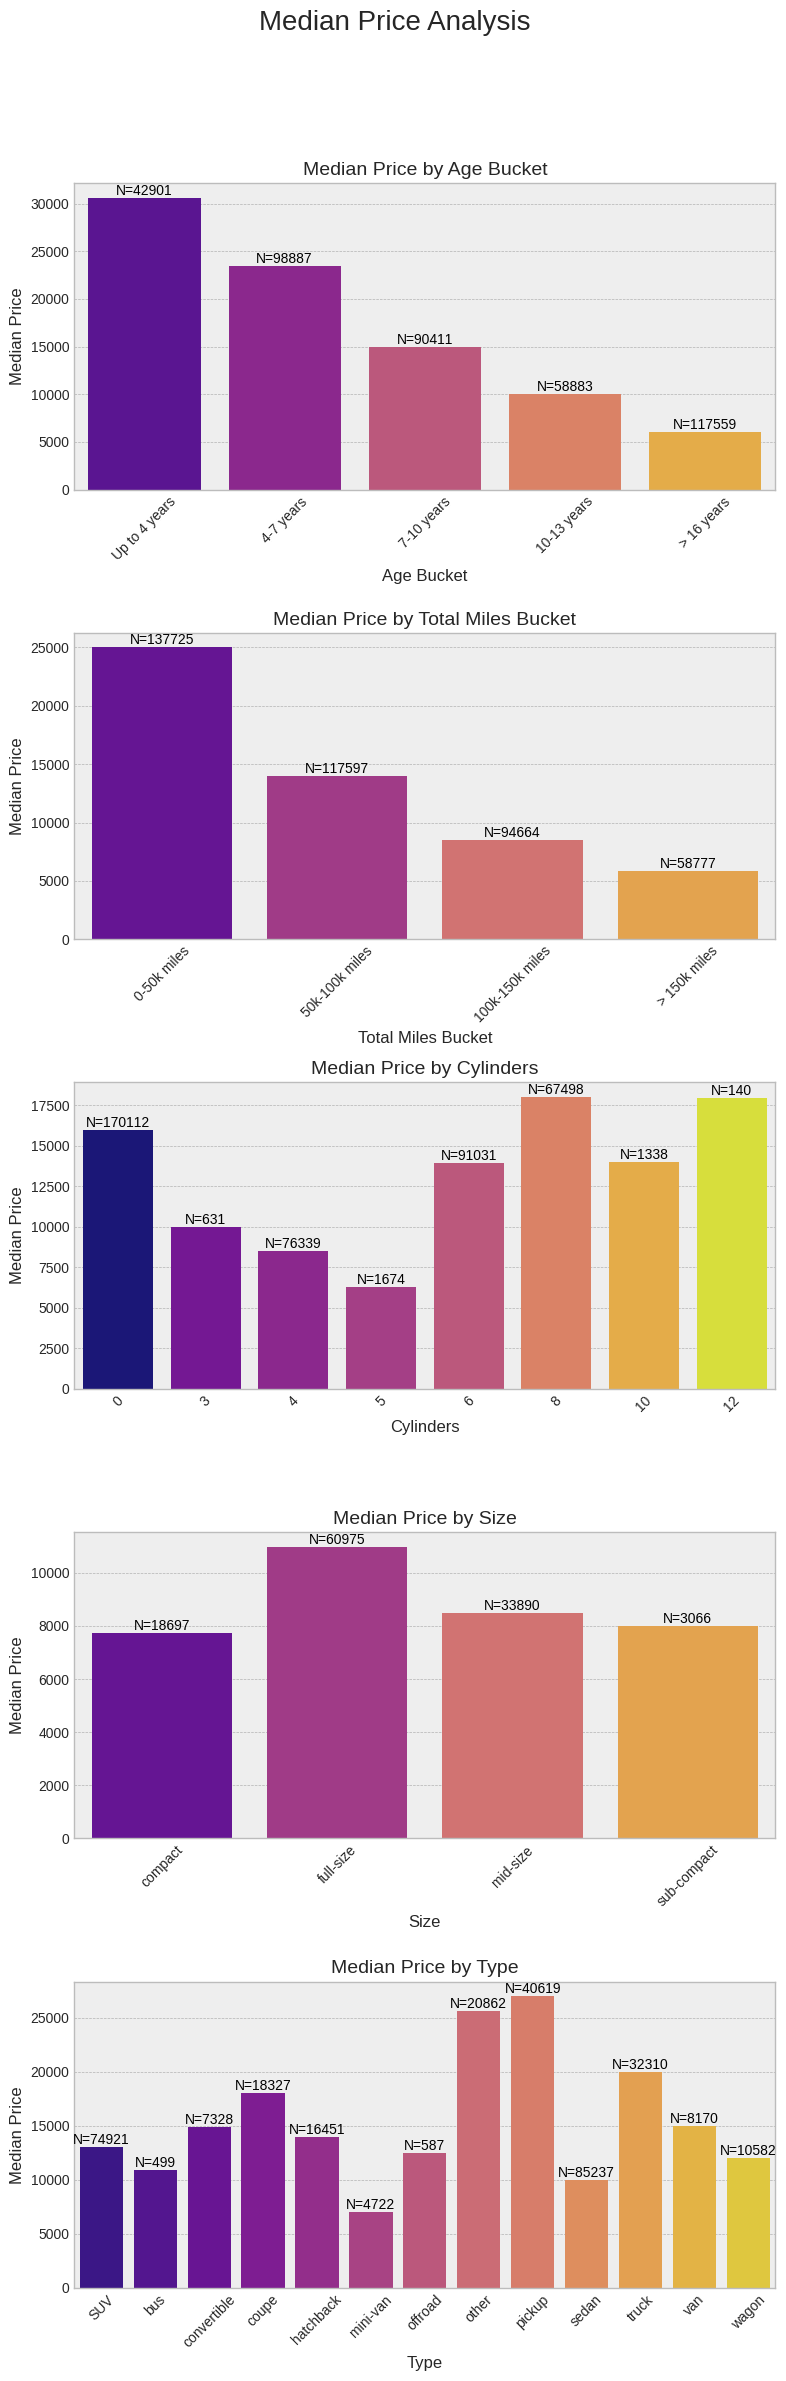

In [42]:
# Price of Car Can be Affected by Many Factors

df = df_cleaned.copy()

df['total_miles'] = df['mileage_per_year'] * df['age']

#1) Age
bins_age = [4, 7, 10, 13, 16, np.inf]
labels_age = ['Up to 4 years', '4-7 years', '7-10 years', '10-13 years', '> 16 years']
df['age_bucket'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False) # right=False to include the lower bound
age_analysis = df.groupby('age_bucket')['price'].agg(['median', 'count']).reset_index()
age_analysis.rename(columns={'median': 'Median Price', 'count': 'N_cars'}, inplace=True)

#2) Miles
bins_total_miles = [0, 50000, 100000, 150000, np.inf]
labels_total_miles = ['0-50k miles', '50k-100k miles', '100k-150k miles', '> 150k miles']
df['total_miles_bucket'] = pd.cut(df['total_miles'], bins=bins_total_miles, labels=labels_total_miles, right=False)
total_miles_analysis = df.groupby('total_miles_bucket')['price'].agg(['median', 'count']).reset_index()
total_miles_analysis.rename(columns={'median': 'Median Price', 'count': 'N_cars'}, inplace=True)

#3) Cylinders
cylinders_analysis = df.groupby('cylinders')['price'].agg(['median', 'count']).reset_index()
cylinders_analysis.rename(columns={'median': 'Median Price', 'count': 'N_cars'}, inplace=True)

#4)Car Size
size_analysis = df.groupby('size')['price'].agg(['median', 'count']).reset_index()
size_analysis.rename(columns={'median': 'Median Price', 'count': 'N_cars'}, inplace=True)

#5) Car Type
type_analysis = df.groupby('type')['price'].agg(['median', 'count']).reset_index()
type_analysis.rename(columns={'median': 'Median Price', 'count': 'N_cars'}, inplace=True)



fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 24))
plt.style.use('bmh')
fig.suptitle('Median Price Analysis', fontsize=20, y=1.02)

plot_data = {
    'Age Bucket': age_analysis,
    'Total Miles Bucket': total_miles_analysis,
    'Cylinders': cylinders_analysis,
    'Size': size_analysis,
    'Type': type_analysis
}

row = 0
for title, data_df in plot_data.items():

    current_x_col = data_df.columns[0]
    barplot = sns.barplot(x=current_x_col, y='Median Price', data=data_df, ax=axes[row], palette='plasma', hue=current_x_col, legend=False)
    axes[row].set_title(f'Median Price by {title}', fontsize=14)
    axes[row].set_xlabel(title, fontsize=12)
    axes[row].set_ylabel('Median Price', fontsize=12)
    axes[row].tick_params(axis='x', rotation=45)

    for i, p in enumerate(barplot.patches):
        n_cars = data_df['N_cars'].iloc[i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        barplot.annotate(f'N={int(n_cars)}', (x, y), ha='center', va='bottom', fontsize=10, color='black')
    row += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.98])


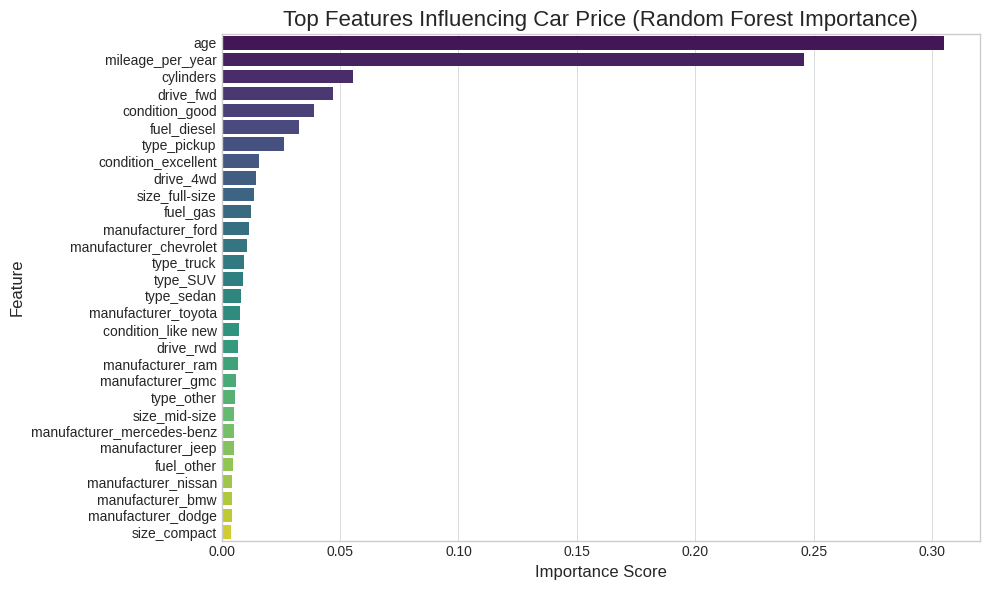

In [37]:
# MODEL 4: Random Forest Regressor - Feature Importance
importances4 = model4.feature_importances_
feature_names_rf = X_train_final.columns
importance_df_rf = pd.DataFrame({'feature': feature_names_rf, 'importance': importances4})
sorted_importance_rf = importance_df_rf.sort_values(by='importance', ascending=False).head(30)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='importance', y='feature', hue='feature', data=sorted_importance_rf, palette='viridis', ax=ax)
ax.set_title('Top Features Influencing Car Price (Random Forest Importance)', fontsize=16)
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()
